# Homework 5 (Dev Mody)
## Exercise 3 (Model Tuning)

Let's return to the MNIST dataset of handwritten data that we worked with previously. We want to experiment with how we best tune a model to get the most optimal version. To that end let us consider the following classifier built in TensorFlow/Keras:

```python
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

alpha = 1
model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer=keras.optimizers.RMSprop(alpha), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history=model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)
```

### Exercise 3.1 

From the history plot `val_loss` versus the epochs for different training rates $\alpha = 1, 0.5, 0.1, 0.01, 0.001$. The loss is in this case defined from the categorical cross-entropy while the accuracy is the percentage of correct predictions. What happens as you decrease the value of $\alpha$? What can you say about the first value of $\alpha = 1$? Explain your results.

In [1]:
from tensorflow.keras.datasets import mnist
import autograd.numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

Epoch 1/10
375/375 [==============================] - 4s 9ms/step - loss: 733.6302 - accuracy: 0.3659 - val_loss: 2.5173 - val_accuracy: 0.2113
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 3.1878 - accuracy: 0.2321 - val_loss: 2.3648 - val_accuracy: 0.1862
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 2.5053 - accuracy: 0.2074 - val_loss: 2.2492 - val_accuracy: 0.1868
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 2.3109 - accuracy: 0.1982 - val_loss: 2.1804 - val_accuracy: 0.2128
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 2.3300 - accuracy: 0.2190 - val_loss: 2.2275 - val_accuracy: 0.2803
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 2.3830 - accuracy: 0.2153 - val_loss: 2.1896 - val_accuracy: 0.2161
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 2.3621 - accuracy: 0.2030 - val_loss: 2.2409 - val_accuracy: 0.1992
Epoc

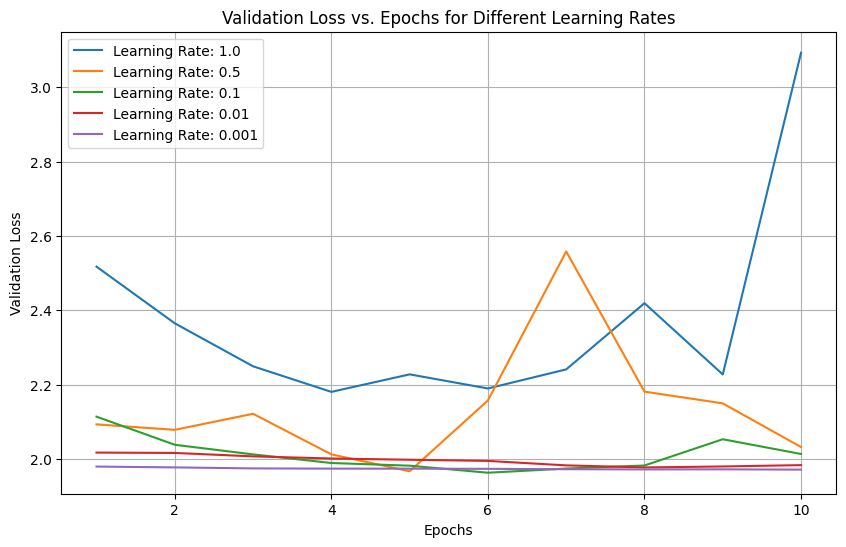

In [2]:
alpha_list = [1., 0.5, 0.1, 0.01, 0.001]
val_loss_histories = {}
model = keras.Sequential([
        layers.Dense(512, activation='relu'),
        layers.Dense(10, activation='softmax')
])

for alpha in alpha_list:
    model.compile(optimizer=keras.optimizers.RMSprop(alpha), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history=model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)
    val_loss_histories[alpha] = history.history['val_loss']

plt.figure(figsize=(10, 6))
for lr, val_loss_history in val_loss_histories.items():
    epochs = range(1, 11)
    plt.plot(epochs, val_loss_history, label=f'Learning Rate: {lr}')
    
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs. Epochs for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()

As the value of the learning rate decreases from 1.0 to 0.001, the validation loss generally shows a smoother descent and becomes more stable across epochs. When the validation loss is very irregular and does not seem to converge which indicated that is way too high. Most likely what is happening is that during optimization the minimum is constantly being overshot. As the values of decrease we can see a clear trend in a decrease in validation loss indicating that for this precise model a choice of on the lower end results in better predictions.

### Exercise 3.2 (MNIST with Logistic Regression)

Now let us look at a very small model just doing logisitic regression on the MNIST Data:

```python
model = keras.Sequential[(layers.Dense(10, activation='softmax'))]
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metircs=['accuracy'])
history_small_model = model.fit(train_images, train_labels, epochs=50, batch_size=128, validation_split=0.2)
```

Note that, if we don't specify any learning rate then the 'rmsprop' optimizer defaults to a learning rate of 0.001. You should again plot the 'val_loss' versus the epochs. Is there a clear minimum in the validation loss indicating where we start to overfit?

Epoch 1/50
375/375 [==============================] - 2s 3ms/step - loss: 0.6807 - accuracy: 0.8312 - val_loss: 0.3624 - val_accuracy: 0.9027
Epoch 2/50
375/375 [==============================] - 1s 2ms/step - loss: 0.3538 - accuracy: 0.9032 - val_loss: 0.3093 - val_accuracy: 0.9144
Epoch 3/50
375/375 [==============================] - 1s 2ms/step - loss: 0.3181 - accuracy: 0.9118 - val_loss: 0.2924 - val_accuracy: 0.9197
Epoch 4/50
375/375 [==============================] - 1s 2ms/step - loss: 0.3019 - accuracy: 0.9162 - val_loss: 0.2845 - val_accuracy: 0.9211
Epoch 5/50
375/375 [==============================] - 1s 2ms/step - loss: 0.2922 - accuracy: 0.9189 - val_loss: 0.2800 - val_accuracy: 0.9230
Epoch 6/50
375/375 [==============================] - 1s 2ms/step - loss: 0.2859 - accuracy: 0.9200 - val_loss: 0.2735 - val_accuracy: 0.9254
Epoch 7/50
375/375 [==============================] - 1s 2ms/step - loss: 0.2807 - accuracy: 0.9215 - val_loss: 0.2720 - val_accuracy: 0.9258
Epoch 

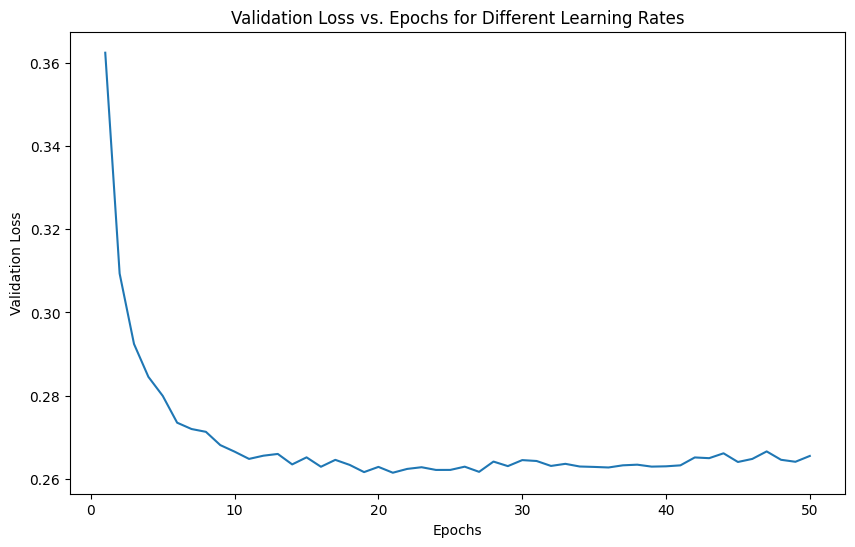

In [3]:
model = keras.Sequential([layers.Dense(10, activation='softmax')])
model.compile(optimizer='rmsprop',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=50,
    batch_size=128,
    validation_split=0.2)

plt.figure(figsize=(10, 6))
epochs = range(1, 51)
plt.plot(epochs, history_small_model.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs. Epochs for Different Learning Rates')
plt.show()

As we can see, the model doesn't have a clear indication of overfitting as the validation loss is still decreasing after 50 epochs, with no sudden increase forming a minimum. We can also observe that for each epoch, the training and the validation seem to go hand in hand, which is a good sign since clear overfitting would show that the training loss is significatnly lower than the validation loss.

### Exercise 3.3 (New Hidden Layers):
Now let us increase the complexity of the model by putting in hidden layers:

```python
model = keras.Sequential([
    layers.Dense(96, activation='relu'),
    layers.Dense(96, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_large_model = model.fit(train_images, train_labels, epochs=50, batch_size=128, validation_split=0.2)
```

Repeat the plot of 'val_loss' versus the epochs. Is there in this case a clear minimum with a well defined region of overfitting? Comment on your observations.

Epoch 1/50
375/375 [==============================] - 2s 4ms/step - loss: 0.3730 - accuracy: 0.8947 - val_loss: 0.1991 - val_accuracy: 0.9428
Epoch 2/50
375/375 [==============================] - 1s 3ms/step - loss: 0.1684 - accuracy: 0.9499 - val_loss: 0.1353 - val_accuracy: 0.9610
Epoch 3/50
375/375 [==============================] - 1s 3ms/step - loss: 0.1179 - accuracy: 0.9650 - val_loss: 0.1189 - val_accuracy: 0.9673
Epoch 4/50
375/375 [==============================] - 1s 3ms/step - loss: 0.0893 - accuracy: 0.9720 - val_loss: 0.1027 - val_accuracy: 0.9690
Epoch 5/50
375/375 [==============================] - 1s 3ms/step - loss: 0.0718 - accuracy: 0.9776 - val_loss: 0.0956 - val_accuracy: 0.9706
Epoch 6/50
375/375 [==============================] - 1s 3ms/step - loss: 0.0583 - accuracy: 0.9817 - val_loss: 0.0903 - val_accuracy: 0.9740
Epoch 7/50
375/375 [==============================] - 1s 3ms/step - loss: 0.0481 - accuracy: 0.9850 - val_loss: 0.0978 - val_accuracy: 0.9704
Epoch 

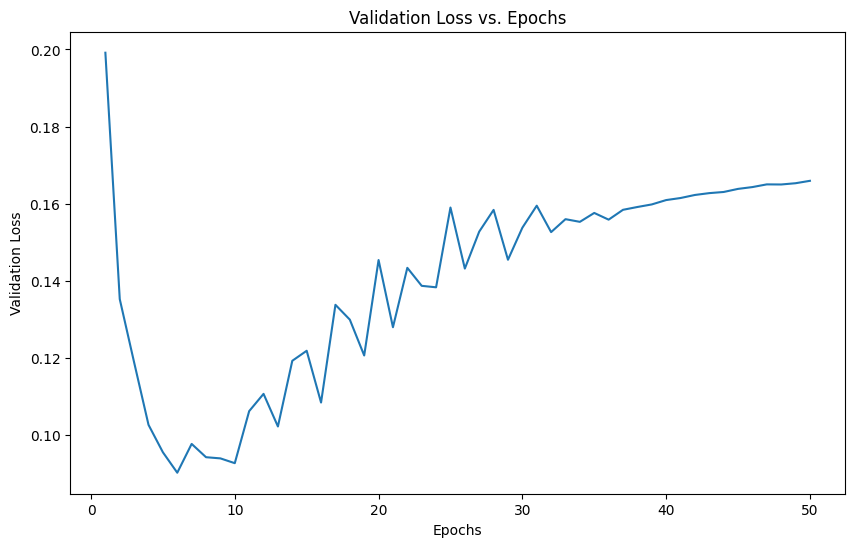

In [4]:
model = keras.Sequential([
    layers.Dense(96, activation='relu'),
    layers.Dense(96, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_large_model = model.fit(train_images, train_labels, epochs=50, batch_size=128, validation_split=0.2)

plt.figure(figsize=(10, 6))
epochs = range(1, 51)
plt.plot(epochs, history_large_model.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs. Epochs')
plt.show()